JOURNAL OF CAFFEINE RESEARCH  
Volume 2, Number 2, 2012  
ª Mary Ann Liebert, Inc.  
DOI: 10.1089/caf.2012.0018  

 <h1><div align="center">Effects of Alcohol, Coffee, and Tobacco, <br></br>
 Alone or in Combination, on Physiological Parameters<br></br>
 and Anxiety in a Young Population</div></h1>

<div align="center">Concepcio´ n Vinader-Caerols, Santiago Monleo´ n, Carmen Carrasco, and Andres Parra</div>

<p style="text-align: justify;"><strong><em>Objective:</em></strong> The objective was to evaluate the effects of a single dose of alcohol, caffeine, and nicotine, alone or in
combination, on physiological parameters (systolic and diastolic blood pressure [SBP and DBP] and heart rate
[HR]) and state-trait anxiety in healthy young volunteers.<br></br>
<strong><em>Method:</em></strong> The procedure reproduces the conditions under which the subjects (n = 76) usually ingest alcohol
(through an alcoholic beverage), caffeine (through a cup of coffee), and nicotine (by smoking a cigarette), separately or in combination, according to their consumption habits of each individual. SBP and DBP, HR, and
state anxiety (SA) were registered before (phase 1) and after (phase 2) treatment.<br></br>
<strong><em>Results:</em></strong> Intake of alcohol or alcohol-nicotine reduced DBP. Comparisons between control and combined treatment (coffee-alcohol-nicotine) groups revealed a decrease in HR in the former group but not in the latter. The coffee consumers alone exhibited a tendency toward an increase in SA, while the control group showed a tendency
toward a decrease in this measure. When Phase 1 and Phase 2 were compared, a decrease was observed in SBP
(alcohol and coffee-alcohol groups), DBP (alcohol and alcohol-nicotine groups), HR (all groups, except coffeealcohol and coffee-alcohol-nicotine groups), and SA (coffee-alcohol-nicotine group).<br></br>
<strong><em>Conclusions:</em></strong> (i) A low dose of alcohol, either alone or in combination with a cigarette, decreases DBP but not SBP;
(ii) the polyconsumption of coffee, alcohol, and nicotine blocks the adaptation response</br> (the reduction in HR in
control subjects in the second phase); (iii) an increase of SA is observed after consuming coffee, while the opposite
occurs in control subjects (a decrease of SA).</p>

#### Introduction

<p style="text-align: justify;"><strong>A</strong>lcohol, caffeine in coffee, and nicotine in tobacco are
the three most widely consumed psychoactive substances in the world. These drugs exert a considerable influence on the cardiovascular system1–3 and behavioral mood
state.1,4 Nicotine and caffeine tend to have the opposite effects to alcohol, with the former two substances producing
stimulating effects and the latter generally producing sedating effects.5
The effects of alcohol, caffeine, and nicotine on the central
nervous system (CNS) are multifaceted, with diverse actions
in several neurotransmitter systems. When a low dose of alcohol is ingested, the dopaminergic, serotonergic, and noradrenergic systems are stimulated.6 On the one hand, the
intake of a high dose of alcohol produces a reduction of dopaminergic and noradrenergic transmission. On the other hand,
gamma-aminobutyric acid (GABA)’s general central depressant actions are potentiated through ethanol-induced
        enhancement of its binding to the GABAA receptor complex.</p>

<p style="text-align: justify;">In the brain, caffeine is a nonselective adenosine receptor
antagonist that mainly targets adenosine A1 and A2A receptors and has agonist effects on dopamine.8,9 Nicotine is a potent activator of the sympathetic nervous system and it also
enhances acetylcholine neurotransmission in the basal forebrain and dopamine release in the mesolimbic dopamine system.10 In contrast to nicotine and caffeine, alcohol acts as a
CNS depressant. In addition, alcohol and adenosine generally
have sedative effects in the CNS. Animal studies have demonstrated that some of the effects of alcohol are mediated by
adenosine; for example, animals that are tolerant to adenosine’s effects are also tolerant to alcohol’s effects, adenosine
agonists exacerbate alcohol’s effects on motor incoordination,
and adenosine induces sedation.11
Considering the social dimension of alcohol, coffee, and tobacco consumption and the fact that large numbers of the
population consume them together, it is surprising that the
possible interactive effects of combinations of these psychoactive drugs on anxiety and cardiovascular functioning and the
relation between them have rarely been examined.</p>

<p style="text-align: center;">Table 1. Summary of Analysis of Variances for Systolic Blood Pressure</p>

In [1]:
import json
import pandas as pd
import numpy as np
from io import StringIO

COLUMN = "retail_and_recreation_percent_change_from_baseline"


TESTDATA = StringIO("""country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
AE,United Arab Emirates,,,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,,,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,,,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,,,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,,,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,,,2020-02-20,-2,1,6,1,1,1
AE,United Arab Emirates,,,2020-02-21,-3,2,6,0,-1,1
AE,United Arab Emirates,,,2020-02-22,-2,2,4,-2,3,1
AE,United Arab Emirates,,,2020-02-23,-1,3,3,-1,4,1""")


def get_data():
    # Get the raw data
    raw_data = pd.read_csv(TESTDATA)
    
    # Take only metrics by state (no sub regions). 
    # Note that we only want the records where sub_region_1 is not available
    raw_data = raw_data.fillna("NA")
    raw_data = raw_data.loc[raw_data["sub_region_1"] == 'NA']

    # Drop the columns that are not needed
    raw_data = raw_data.drop(["country_region_code", "sub_region_1", "sub_region_2"], axis=1)    
    
    # Create the JSON we will use in the Javascript code
    countries = np.unique(raw_data["country_region"])
    final_dict = {
        "dates": list(raw_data.loc[raw_data["country_region"]=="United Arab Emirates"].sort_values("date")["date"].values),
        "country_data":[]
    
    }
    
    # Create one element of the "country_data" array for each country
    for _c in countries:
        _tmp_data = raw_data.loc[raw_data["country_region"] == _c].sort_values("date")
        _data = _tmp_data[COLUMN]
        final_dict["country_data"].append({
            "name": _c,
            "data": list(_data.values)
        })

    # Return the JSON dump
    return json.dumps(final_dict)

In [2]:
%%javascript
// Import eCharts, the Javascript charting library
require.config({
    paths: {
        ech: 'https://cdnjs.cloudflare.com/ajax/libs/echarts/4.8.0/echarts.min'
    }
});

<IPython.core.display.Javascript object>

In [3]:
%%javascript
// The output of get_data will be stored in the following function
window.outputVar = null

IPython.notebook.kernel.execute(
    "get_data()", 
    {
        iopub: {
            output: function(response) {
                // Get output as plain text
                var output = response.content.data["text/plain"];
                                console.log(output)
                
                // Remove unwanted characters
                output = output.substring(1, output.length-1).replace("\\'","'")
                
                // Set the variable
                window.outputVar = JSON.parse(output)
            }
        }
    },
    {
        silent: false, 
        store_history: false, 
        stop_on_error: true
    }
)

<IPython.core.display.Javascript object>

In [4]:
%%javascript
window.buildChart = function(cellElement){
(function(element) {
    // Execute the following code after requiring `ech`
    require(['ech'], function(ech) {
        
        // The `ech` variable contains echarts
        var echarts = ech
        
        // Append to the current "Cell Element" the chart's container
        cellElement.append("<div id='main' style='height:500px;'>hi</div>")
        
        // Init Highcharts
        var myChart = echarts.init(document.getElementById('main'));
        
        // Create data object
        var data = window.outputVar
        
        // Save the dates in a separate variable
        var dates = data.dates
        
        var series = []
        for(var _i=0; _i<data.country_data.length; _i++){
            var _name = data.country_data[_i]["name"]
            var _data = data.country_data[_i]["data"]
            
            series.push({
                name: _name,
                type: 'line',
                data: _data
            })
        }
        
        
        myChart.setOption({
            title: {
                text: 'Google COVID-19 Mobility'
            },
            tooltip: {
                trigger: 'item'
            },
            grid: {
                left: '3%',
                right: '4%',
                bottom: '3%',
                containLabel: true
            },
            xAxis: {
                type: 'category',
                data: dates // We can get this array directly from the `get_data()` output
            },
            yAxis: {
                type: 'value'
            },
            series: series // We just need to create this
        })
    })
})(element);
}

<IPython.core.display.Javascript object>

In [5]:
%%javascript
window.buildChart(element)

<IPython.core.display.Javascript object>

python: 3.8.5
matplotlib: 3.3.2


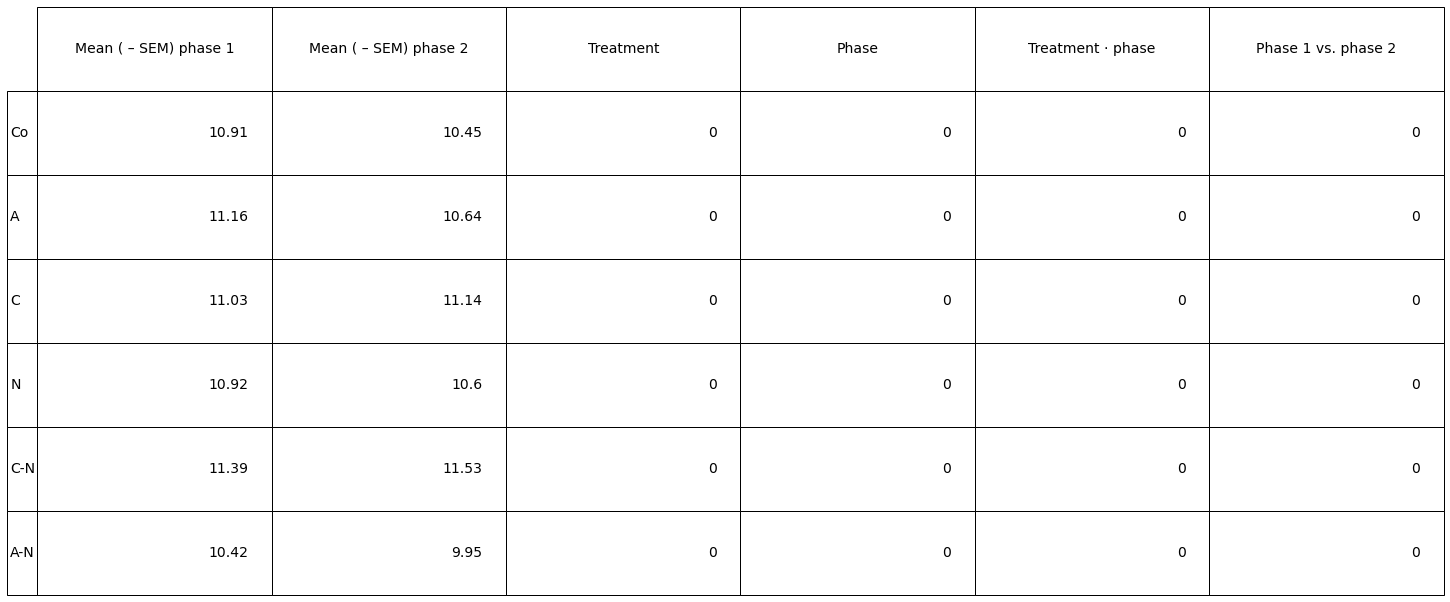

In [6]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Mean ( – SEM) phase 1', 'Mean ( – SEM) phase 2', 'Treatment', 'Phase', 'Treatment · phase', 'Phase 1 vs. phase 2']
row_labels = ['Co', 'A', 'C', 'N', 'C-N', 'A-N']
table_vals = [[10.91,  10.45, 0, 0, 0, 0], [11.16, 10.64, 0, 0, 0, 0], [11.03, 11.14, 0, 0, 0, 0], [10.92, 10.6, 0, 0, 0, 0], [11.39, 11.53, 0, 0, 0, 0], [ 10.42, 9.95, 0, 0, 0, 0] ]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 6,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.01)

* p < 0.05.<br></br>
Treatment groups (for this and the following tables): Co, control; A, alcohol; C, caffeine; N, nicotine; C-N, caffeine-nicotine; A-N, alcoholnicotine; C-A, caffeine-alcohol; C-A-N, caffeine-alcohol-nicotine; n.s., not significant.  

<p style="text-align: justify;">Nicotine and alcohol are often consumed concurrently.12
When consumed alone they produce significant subjective
and cardiovascular responses, but nicotine attenuates the sedating and intoxicating effects of alcohol and additive subjective and cardiovascular effects are generally observed when
the two drugs are consumed together.13 For example, infusion of nicotine after ingestion of alcohol produces an additive increase in the heart rate (HR) and systolic blood
pressure (SBP).14
Caffeine consumption is widespread among young students.15 Caffeine has been associated with increases in several
cardiovascular disease risk factors,16,17 such as higher blood
pressure (BP), an acute effect of coffee.18 In contrast, recent
studies have reported health benefits associated with coffee
consumption.19,20 At low doses, caffeine improves hedonic
tone and reduces anxiety, while it produces an increase in
tense arousal, including anxiety, nervousness, and jitteriness,
at high doses.21 Several studies have found that caffeine can
reverse many of the performance-impairing effects of ethanol22; for example, a low dose of caffeine prevented the sleepiness and performance impairment associated with a
moderate dose of ethanol.23 Conversely, there are studies of
the effects of caffeine on alcohol-induced impairment that
have not shown the former drug to reverse the performance
deficit produced by the latter.24
A combination of nicotine and caffeine generally produces
additive subjective and cardiovascular effects.25,26 A significant association between nicotine and caffeine has been
detected in subjective measures and BP responses.27 The results of some research endorse giving coffee rather than
pure caffeine to subjects as a more appropriate method of
evaluating its effects, as this reproduces the conditions</p><br></br>
<p style="text-align: justify;">under which caffeine is normally ingested.28 This reasoning
can be translated to tobacco and alcohol; smoking a cigarette
reproduces the conditions under which nicotine is normally
consumed, and drinking an alcoholic beverage reproduces
the conditions under which alcohol is normally consumed.
As far as we know, to date no studies have investigated the
combined effects of alcohol, coffee, and tobacco administered
in these conditions.
The objective of the present research was to evaluate the effects of a single dose of alcohol, caffeine, and nicotine, alone or
in combination, on several physiological measures (SBP and
diastolic blood pressure [DBP] and HR) and on state-trait anxiety in healthy young volunteers by reproducing the manner
in which they are normally consumed by these subjects.<br></br></p>

#### Materials and Methods

*Subjects*

<p style="text-align: justify;">Participants were 76 healthy undergraduate students at the
Faculty of Psychology, University of Valencia, Spain (12 men
and 64 women; numbers were representative of the gender
distribution of these students in the Psychology Faculty;
mean age: 20.34 – 2.34 years). The volunteers were recruited
as experimental subjects for this study according to self-report
of their consumption habits and general health. They were
distributed as follows: 10 control subjects, 10 smokers ( ‡ 7 cigarettes per day), 10 habitual coffee consumers ( ‡ 1 cup of coffee per day), 10 social consumers of alcohol ( ‡ 3 standard
drinks per week), 10 smokers and habitual coffee consumers,
8 smokers and social consumers of alcohol, 9 social consumers
of alcohol and habitual coffee consumers, and 9 smokers, habitual coffee consumers, and social consumers of alcohol.</p>

<p style="text-align: center;">Table 2. Summary of Analysis of Variances for Diastolic Blood Pressure</p>

python: 3.8.5
matplotlib: 3.3.2


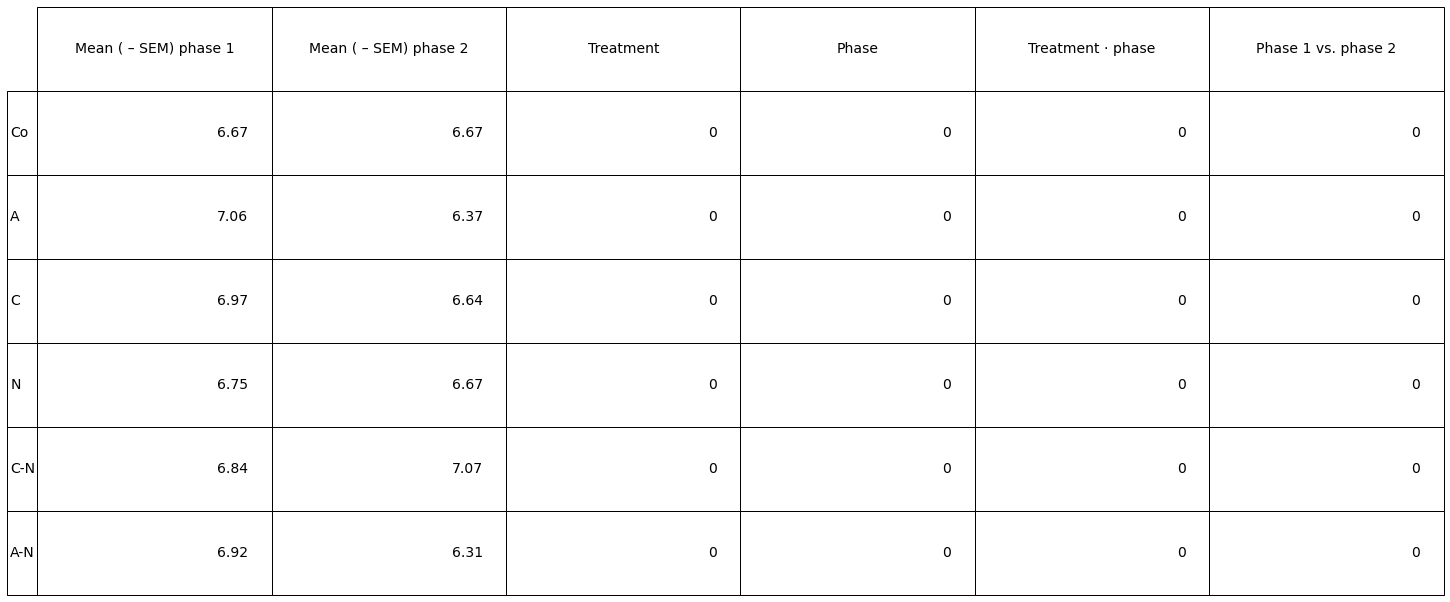

In [7]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Mean ( – SEM) phase 1', 'Mean ( – SEM) phase 2', 'Treatment', 'Phase', 'Treatment · phase', 'Phase 1 vs. phase 2']
row_labels = ['Co', 'A', 'C', 'N', 'C-N', 'A-N']
table_vals = [[6.67,  6.67, 0, 0, 0, 0], [7.06, 6.37, 0, 0, 0, 0], [6.97, 6.64, 0, 0, 0, 0], [6.75, 6.67, 0, 0, 0, 0], [6.84, 7.07, 0, 0, 0, 0], [6.92, 6.31, 0, 0, 0, 0] ]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 6,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.01)

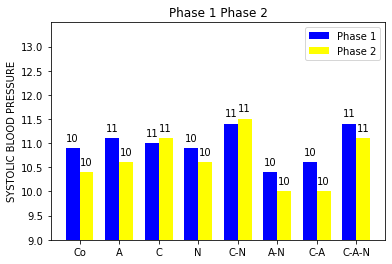

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
phase1_means = (10.9, 11.1, 11, 10.9, 11.4, 10.4, 10.6, 11.4)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, phase1_means, width, color='b')

phase2_means = (10.4, 10.6, 11.1, 10.6, 11.5, 10, 10, 11.1)
rects2 = ax.bar(ind + width, phase2_means, width, color='yellow')

# add some text for labels, title and axes ticks
ax.set_ylabel('SYSTOLIC BLOOD PRESSURE')
ax.set_title('Phase 1 Phase 2')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Co', 'A', 'C', 'N', 'C-N', 'A-N', 'C-A', 'C-A-N'))

ax.legend((rects1[0], rects2[0]), ('Phase 1', 'Phase 2'))
ax.set_yticks(np.arange(9,13.5,step=0.5))
ax.set_ylim(9,13.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p style="text-align: justify;"><strong>FIG. 1.</strong> Mean ( + SEM) systolic blood pressure. Treatment
groups: Co, control; A, alcohol; C, caffeine; N, nicotine; CN, caffeine-nicotine; A-N, alcohol-nicotine; C-A, caffeinealcohol; C-A-N, caffeine-alcohol-nicotine.</p>

<p style="text-align: justify;">Informed consent was obtained from all participants and
the study was conducted in accordance with the Declaration
of Helsinki. The inclusion criteria were as follows: 18 years
old or older, a body mass index of 18–27, and good health
(reported by the subjects themselves). The exclusion criteria
were as follows: being on medication, a history of mental disorders, an irregular sleep pattern during the night before the
experiment, a history of substance abuse, and intake of caffeine, alcohol, or tobacco during the afternoon-night prior to
the experiment, except in the case of the habitual consumers.</p>

*Tests and apparatus*
<p style="text-align: justify;">
- The State-Trait Anxiety Inventory (STAI)29 is a questionnaire consisting of 20 items referring to self-reported state anxiety (SA) and 20 items referring to trait anxiety (TA). All subjects completed the standardized Spanish version of the STAI.<br></br>
- The Alcohol Use Disorders Identification Test (AUDIT)30 was employed to measure alcohol dependency among the subjects. AUDIT is composed of 10 questions examining the quantity and frequency of alcohol drinking and alcohol-related behaviors and consequences, with a range of 0–40 in which a score of 8 or more indicates a problematic use of alcohol. A higher score is related to greater severity of alcohol dependence.<br></br>
- The Fagerstro¨m Test for Nicotine Dependence31 was used to measure nicotine dependency among subjects. The test is comprised of 6 items with a range of 0–10, with higher scores indicating greater dependence.
- An alcoholmeter (Alcoquant 6020, Envitec, Germany) was used to measure the concentration of alcohol in air expired by the social consumers of alcohol, before and after a drink.<br></br>
- A co-oximeter (micro-CO meter, Micro Medical Limited, England) was employed to measure the concentration of carbon monoxide (CO) in air expired by smokers before and after smoking a cigarette.<br></br>
- A digital automatic blood pressure monitor (M10-IT, OMRON, Spain) was used to measure SBP, DBP, and HR in all the subjects.</p>

*Procedure*

<p style="text-align: justify;">The experimental procedure was approved by the Human
Research Committee of the University of Valencia. According
to their consumption habits, subjects were assigned to one of
eight experimental treatment groups: Alcohol (A) (15.8 g in
women and 18.7 g in men through an alcoholic beverage;
these alcohol doses were chosen for every gender following
the Widmark formula32 to obtain similar expected blood
alcohol contents); Caffeine (C) (intake of a cup of coffee containing 80.6–86.73 mg caffeine, determined using the highperformance liquid chromatography technique); Nicotine
(N) (the smoking of a cigarette after a minimum period of abstinence of 30 minutes); Caffeine-Nicotine (C-N) (the smoking
of a cigarette and intake of a cup of coffee); Alcohol-Nicotine
(A-N) (intake of an alcoholic drink and the smoking of a cigarette); Caffeine-Alcohol (C-A) (intake of a cup of coffee and
an alcoholic drink); Caffeine-Alcohol-Nicotine (C-A-N) (intake of a cup of coffee and an alcoholic drink and the smoking of a cigarette); and Control group (Co) (no intake). Each
subject participated in two phases separated by an interval
of 25 minutes: treatment (10 minutes) and waiting time (15
minutes). In the first phase, the physiological parameters of
BP and HR were registered in all the subjects. The concentration of CO in the smokers was measured using a co-oximeter
and the concentration of alcohol in the social consumers was
measured by an alcoholmeter. SA was assessed using the
STAI. In the second phase, the same measures were registered,
as were TA, the AUDIT for alcoholic dependence in social consumers of alcohol (mean score: 6.5 – 1.08), and the Fagerstro¨m
questionnaire for smokers (mean score: 2.51 – 0.41). An increase of CO was observed in all smokers after smoking a cigarette. The index of the concentration of alcohol in air expired
before and after taking an alcoholic drink was 0.00 mg/L and
0.10–0.19 mg/L, respectively. All the experimental tests were
performed between 10:00 a.m. and 01:00 p.m.</p>

*Statistics*

<p style="text-align: justify;">Separate analysis of variances (ANOVAs) were performed
for each measure (SBP, DBP, HR, SA, and TA) in each treatment group (A, C, N, C-N, A-N, C-A, and C-A-N) with respect to Co,
with two factors: the between-subjects factor ‘‘Treatment’’ and
the intra-subjects factor ‘‘Phase.’’ When their interaction was
statistically significant, post hoc analyses were carried out by
means of Student’s t-tests for dependent and independent samples. Correlations between SA and the rest of the physiological
parameters were calculated. All analyses were performed using
the ‘‘Statistica’’ software package, version 5.5 for windows.</p>

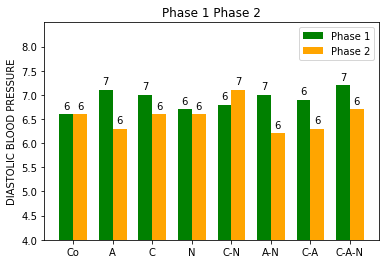

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
phase1_means = (6.6, 7.1, 7, 6.7, 6.8, 7, 6.9, 7.2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, phase1_means, width, color='green')

phase2_means = (6.6, 6.3, 6.6, 6.6, 7.1, 6.2, 6.3, 6.7)
rects2 = ax.bar(ind + width, phase2_means, width, color='orange')

# add some text for labels, title and axes ticks
ax.set_ylabel('DIASTOLIC BLOOD PRESSURE')
ax.set_title('Phase 1 Phase 2')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Co', 'A', 'C', 'N', 'C-N', 'A-N', 'C-A', 'C-A-N'))

ax.legend((rects1[0], rects2[0]), ('Phase 1', 'Phase 2'))
ax.set_yticks(np.arange(4,8.5,step=0.5))
ax.set_ylim(4,8.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p style="text-align: justify;"><strong>FIG. 2.</strong> Mean ( + SEM) diastolic blood pressure. Treatment
groups: Co, control; A, alcohol; C, caffeine; N, nicotine;
C-N, caffeine-nicotine; A-N, alcohol-nicotine; C-A, caffeinealcohol; C-A-N, caffeine-alcohol-nicotine. **p < 0.01 versus
                                                                                                                 same group pretreatment.</p>

<p style="text-align: center;">Table 3. Summary of Analysis of Variances for Heart Rate</p>

python: 3.8.5
matplotlib: 3.3.2


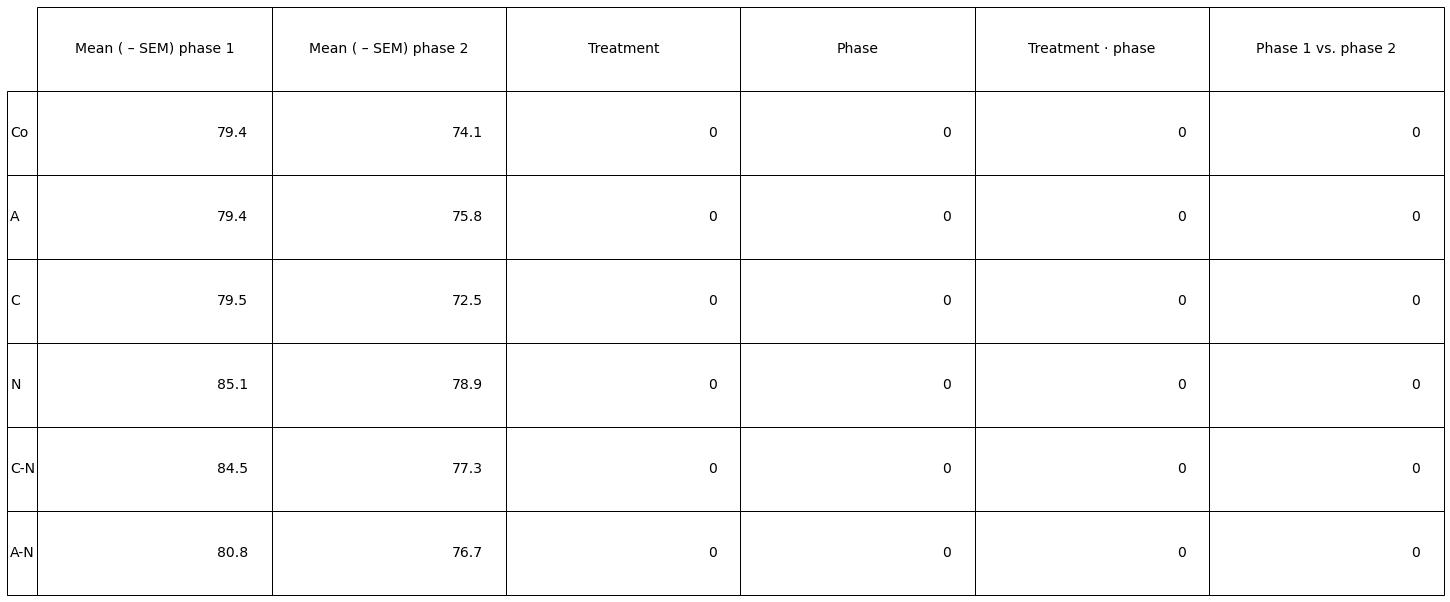

In [17]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Mean ( – SEM) phase 1', 'Mean ( – SEM) phase 2', 'Treatment', 'Phase', 'Treatment · phase', 'Phase 1 vs. phase 2']
row_labels = ['Co', 'A', 'C', 'N', 'C-N', 'A-N']
table_vals = [[79.4,  74.1, 0, 0, 0, 0], [79.4, 75.8, 0, 0, 0, 0], [79.5, 72.5, 0, 0, 0, 0], [85.1, 78.9, 0, 0, 0, 0], [84.5,  77.3, 0, 0, 0, 0], [80.8, 76.7, 0, 0, 0, 0] ]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 6,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.01)

**Results**

*Blood pressure*

<p style="text-align: justify;">A summary of the BP results is provided in Tables 1 and 2.
The ANOVAs revealed that the factor ‘‘Treatment’’ was not
significant for SBP or DBP in any of the treatment groups.
When the factor ‘‘Phase’’ was significant, a decrease of SBP
and DBP was observed in the A group [F(1,18) = 4.5; p < 0.05
and F(1,18) = 8.66; p < 0.01, respectively] and a decrease of
DBP was observed in the A-N group [F(1,16) = 5.78; p < 0.05].
No significant interaction was found for SBP (see Fig. 1).
Significant interactions were observed in the treatment
group A [F(1,18) = 8.65; p < 0.01] and in the treatment group
A-N [F(1,16) = 5.78; p < 0.05] for DBP. The comparisons of dependent samples revealed no changes in DBP in the control
group [t(9) = 0; n.s.] and a decrease in the A [t(9) = 5.67;
p < 0.005] and A-N [t(7) = 4.60; p < 0.005] treatment groups
(see Fig. 2). The comparisons of independent samples showed
no significant differences ( ps > 0.05).</p>
    
*Heart rate*
    
<p style="text-align: justify;">A summary of HR results is provided in Table 3.
The factor ‘‘Treatment’’ was not significant for HR in any of
the treatment groups. When the factor ‘‘Phase’’ was significant, a decrease of HR was observed in the following treatment groups: A [F(1,18) = 9.20; p < 0.01], C [F(1,18) = 25.30;
p < 0.01], N [F(1,18) = 10.22; p < 0.01], C-N [F(1,18) = 16.78;
p < 0.01], and A-N [F(1,16) = 7.30; p < 0.01]. A significant interaction was detected for the C-A-N treatment group
[F(1,17) = 6.05; p < 0.05] and a tendency toward a significant
interaction was observed in the C-A group [F(1,17) = 3.84;
p = 0.06]. The comparisons of dependent samples showed a
significant decrease in the control group [t(9) = 3.15; p < 0.05]
and no differences in the C-A-N group [t(8) = 0.55; n.s.] and
the C-A group [t(8) = 0.38; n.s.] (see Fig. 3). The comparisons
of independent samples showed no significant differences
( ps > 0.05).</p>
    
*State-trait anxiety*
    
<p style="text-align: justify;">A summary of the SA results is provided in Table 4.
The factor ‘‘Treatment’’ was significant in the A treatment
group, in which there was an increase of SA. The factor
‘‘Phase’’ was significant in C-A-N treatment group, which
showed a decrease in SA. A significant interaction with SA
was observed only in the C treatment group [F(1,18) = 7.49;
p < 0.05]. The comparisons of dependent samples showed a
tendency toward a decrease in the control group [t(9) = 1.99;
p = 0.07] and an increase of SA in the C treatment group
[t(9) = 2.02; p = 0.07] (see Fig. 4). The comparisons of independent samples showed no significant differences ( ps > 0.05).
No significant effects on TA were observed for any of the
treatment groups in any of the ANOVAs performed.
Posttreatment correlations between SA and BP (systolic
and diastolic) and SA and HR are indicated in Table 5. Statistically significant positive correlations were observed between SA and DBP ( p < 0.05) in the C group, and between
SA and HR ( p < 0.05) in the N group.</p> 

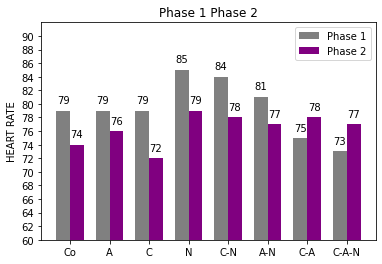

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
phase1_means = (79, 79, 79, 85, 84, 81, 75, 73)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, phase1_means, width, color='grey')

phase2_means = (74, 76, 72, 79, 78, 77, 78, 77)
rects2 = ax.bar(ind + width, phase2_means, width, color='purple')

# add some text for labels, title and axes ticks
ax.set_ylabel('HEART RATE')
ax.set_title('Phase 1 Phase 2')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Co', 'A', 'C', 'N', 'C-N', 'A-N', 'C-A', 'C-A-N'))

ax.legend((rects1[0], rects2[0]), ('Phase 1', 'Phase 2'))
ax.set_yticks(np.arange(60,92,step=2))
ax.set_ylim(60,92)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p style="text-align: justify;"><strong>FIG. 3.</strong> Mean ( + SEM) heart rate. Treatment groups: Co,
control; A, alcohol; C, caffeine; N, nicotine; C-N, caffeine-nicotine; A-N, alcohol-nicotine; C-A, caffeine-alcohol; C-A-N,
    caffeine-alcohol-nicotine. *p < 0.05 versus same group pretreatment.</p>

<p style="text-align: center;">Table 4. Summary of Analysis of Variances for State Anxiety</p>

python: 3.8.5
matplotlib: 3.3.2


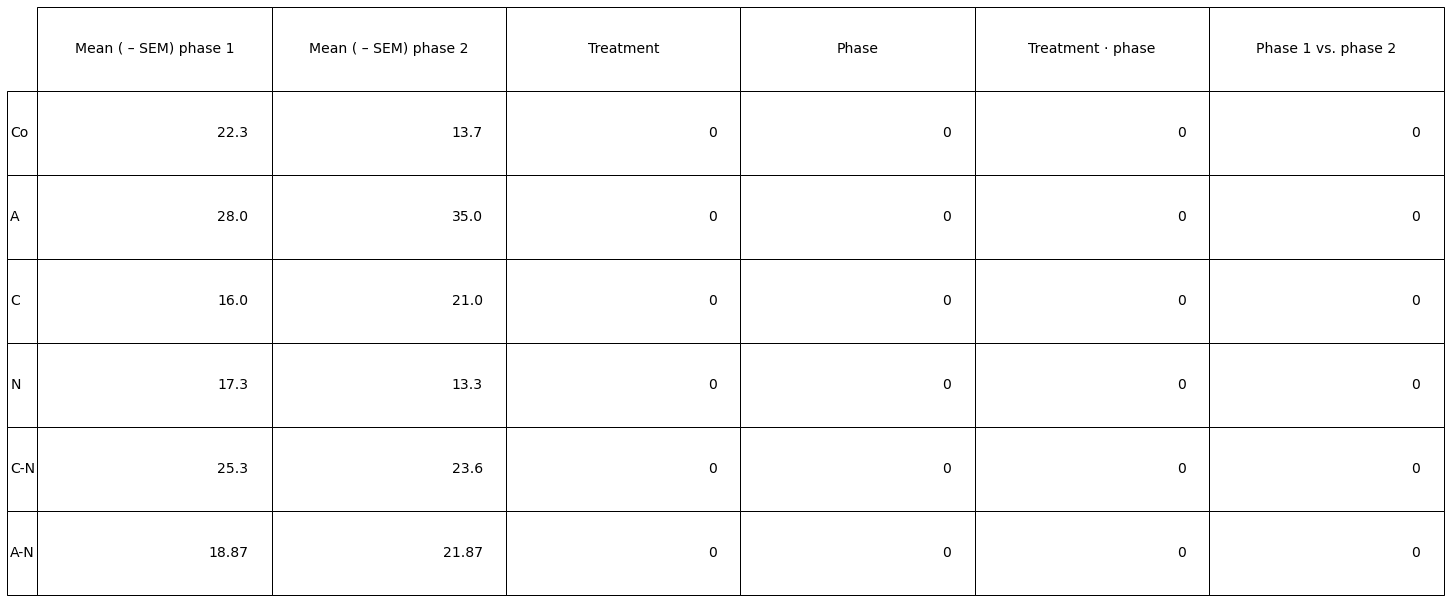

In [12]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['Mean ( – SEM) phase 1', 'Mean ( – SEM) phase 2', 'Treatment', 'Phase', 'Treatment · phase', 'Phase 1 vs. phase 2']
row_labels = ['Co', 'A', 'C', 'N', 'C-N', 'A-N']
table_vals = [[22.3,  13.7, 0, 0, 0, 0], [28.0, 35.0, 0, 0, 0, 0], [16.0,  21.0, 0, 0, 0, 0], [ 17.3, 13.3, 0, 0, 0, 0], [25.3, 23.6, 0, 0, 0, 0], [ 18.87, 21.87, 0, 0, 0, 0] ]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 6,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.01)

**Discussion**
    
<p style="text-align: justify;">Alcohol, coffee, and tobacco are the most widely consumed psychoactive substances in the world, and the effects of each one have been widely studied. However, the effects of theirpolyconsumption at low doses on physiological parameters
and anxiety in young populations have rarely been examined.
We have observed in our student population that DBP decreases after intake of alcohol, either alone or in combination
with a cigarette, while no significant effects on SBP are produced. This finding challenges previously published data
suggesting that alcohol consumption increases BP34 and
that the infusion of nicotine after ingestion of alcohol produces an additive increase in HR and SBP.14 An almost significant negative correlation between anxiety and SBP—the
lower the SBP, the higher the SA—was detected in the alcohol-nicotine group. However, no changes in SBP and SA
were observed in this treatment group.
HR decreased, independently of the factor ‘‘Treatment,’’ in
all our subjects, with the exception of the C-A and C-A-N polyconsumers. We believe that this effect could be due to a process of adaptation to the experimental situation, reflecting a
physiological relaxation characterized by a decrease in HR.
The interaction of ‘‘Treatment’’ and ‘‘Phase’’ was statistically
significant only in the polyconsumption (C-A-N) group,
while there was a tendency toward significance in the C-A
group. A reduction of HR was observed in the control
group, as previously reported,35 while the combined intake
of coffee, alcohol, and nicotine blocked an adaptation of this
physiological response. The novelty of these results lies in
that the strongest effects were observed with a combination of the three substances, which suggests a synergic effect
that is not present when any one drug is consumed alone
or paired with one of the other two.
With respect to SA, alcohol consumers showed higher levels of SA than control subjects when the factor ‘‘Phase’’ was
not considered. However, under the acute effects of alcohol,
SA did not vary in these consumers. The literature shows
that during acute alcohol intake caffeine antagonizes the unwanted effects of alcohol by blocking the adenosine A1 receptor that mediates alcohol’s somnogenic and ataxic effects.36
We did not observe this antagonism of the two drugs with respect to SA. Caffeine alone had anxiogenic effects, in contrast
to the anxiolytic observed by Nehlig21 with low doses of caffeine, and no effects were observed with alcohol. Our coffee
consumers showed a different pattern of SA response when
compared with control subjects; after coffee consumption
SA increased in the former group and decreased in the latter
group. The dose of caffeine employed (80.6–86.73 mg) is
within the range of those commonly administered in studies
examining the effects of this substance.37–39 Our results are
similar to those of other studies reporting an alteration of
SA38 and studies in which neither HR nor BP was altered
by doses of 75 and 150 mg of caffeine, alone38,40 or in combination with nicotine.40 We think that the dose administered in
the present study was too low to modify the pattern of cardiovascular response or to produce the additive cardiovascular
effects (when combined with nicotine) previously described
by Perkins et al.
25 Nevertheless, we can report that caffeine
disrupts the process of adaptation to an experimental situation without disrupting cardiovascular parameters.
In contrast to our results, other studies have found that nicotine affects anxiety.41,42 However, the route of administration, dose, and time course could result in a differential
activation of the pathways involved in emotionality, so
that, depending on the behavioral study in question, nicotine
may have either an anxiolytic or anxiogenic effect.42
As expected, all our subjects exhibited similar TA independently of the treatment received. In accordance with this finding, it is reasonable to suppose that differences in SA
observed in the treatment groups were due to the experimental treatment in question rather than to stable individual differences of personality.
Although a positive correlation was observed between
anxiety and DBP in the caffeine group (the higher the SA,
the higher the DBP), only SA (and not BP) was affected in
the caffeine consumers. The scarcity of correlations between
anxiety and cardiovascular parameters (see Table 5) is in agreement with literature, in which anxiety appears not manifested by elevated HR and BP in healthy population.43
Nicotine normally elicits a potent cardiovascular activity.44
However, our results demonstrate that its administration in
the form of a cigarette after a minimum abstinence period induces tolerance to cardiovascular responses to this drug in
young normotensives. A positive correlation between anxiety
and HR was observed in this group of smokers—the higher
the SA, the higher HR—but neither SA nor HR was affected
in this treatment group. A positive close-to-significant correlation between anxiety and DBP was also detected in this
group, although these measures (BP and SA) were not affected by nicotine.
In summary, taking into account that the present results
have been obtained in a sample of young people according
to their consumption habits and reproducing the conditions
under which they normally consume these substances, we
can affirm that</p>
    
(1) a low dose of alcohol, either alone or in combination with a cigarette, decreases DBP but not SBP.
    (2) HR is unaffected with respect to controls, with the exception of combined consumption of coffee, alcohol and nicotine, in which there is a blockage of the normal adaptation response.
    (3) an increase of SA occurs after consumption of coffee, while control subjects show an opposite pattern (a decrease of SA).
    
<p style="text-align: justify;">Future research is required to better understand the interrelationships between alcohol, caffeine, and tobacco in
young people with consumption habits established since adolescence. Importantly, the conditions under which subjects
normally consume these substances should be reproduced
as closely as possible when carrying out such studies. Knowledge of these factors should be of great assistance in the development and improvement of drug addiction prevention
programs.
    
**Acknowledgments**
    
<p style="text-align: justify;">The authors wish to thank Mr. Brian Normanly for his editorial assistance. This study is supported by a grant GV2007-
083 from ‘‘Generalitat Valenciana,’’ Spain (PI: C.V.-C.).</p>
    
**Author Disclosure Statement**
    
All authors declare that they have no conflicts of interest.

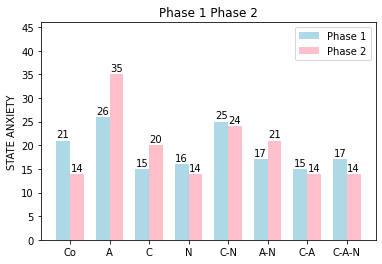

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
phase1_means = (21, 26, 15, 16, 25, 17, 15, 17)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, phase1_means, width, color='lightblue')

phase2_means = (14, 35, 20, 14, 24, 21, 14, 14)
rects2 = ax.bar(ind + width, phase2_means, width, color='pink')

# add some text for labels, title and axes ticks
ax.set_ylabel('STATE ANXIETY')
ax.set_title('Phase 1 Phase 2')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Co', 'A', 'C', 'N', 'C-N', 'A-N', 'C-A', 'C-A-N'))

ax.legend((rects1[0], rects2[0]), ('Phase 1', 'Phase 2'))
ax.set_yticks(np.arange(0,46,step=5))
ax.set_ylim(0,46)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p style="text-align: justify;"><strong>FIG. 4.</strong> Mean ( + SEM) state anxiety. Treatment groups: Co,
control; A, alcohol; C, caffeine; N, nicotine; C-N, caffeinenicotine; A-N, alcohol-nicotine; C-A, caffeine-alcohol; C-A-N,
caffeine-alcohol-nicotine. + p = 0.07 versus same group pretreatment.</p>

<p style="text-align: center;">Table 5. Posttreatment Correlations Between State
Anxiety and Systolic Blood Pressure, Diastolic
Blood Pressure, and Heart Rate</p>

python: 3.8.5
matplotlib: 3.3.2


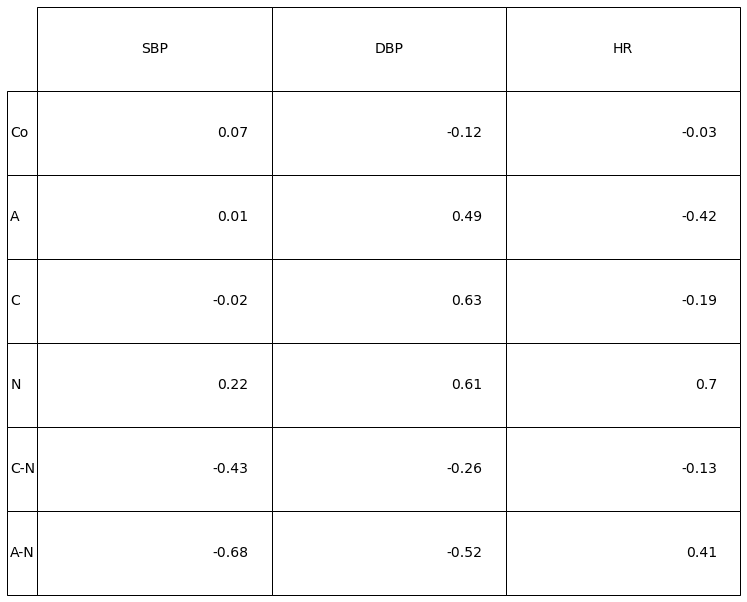

In [14]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels = ['SBP', 'DBP', 'HR']
row_labels = ['Co', 'A', 'C', 'N', 'C-N', 'A-N']
table_vals = [[ 0.07,  -0.12, -0.03], [0.01, 0.49, -0.42], [-0.02, 0.63, -0.19], [0.22, 0.61, 0.70], [-0.43, -0.26, -0.13 ], [-0.68, -0.52,  0.41]]

# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(7, 7)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.01)

In [15]:
%%HTML
<div align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/WN0jU1-Ni-Y" frameborder="0" allowfullscreen></iframe></div>

**References**
     
1. Arciero PJ, Ormsbee MJ. Relationship of blood pressure, behavioral mood state, and physical activity following caffeine
ingestion in younger and older women. Appl Physiol Nutr
Me. 2009;34:754–762.
    
2. Balakumar P, Kaur J. Is nicotine a key player or spectator in
the induction and progression of cardiovascular disorders?
Pharmacol Res. 2009;60:361–368.
    
3. Klatsky AL. Alcohol and cardiovascular diseases. Expert Rev
Cardiovasc Ther. 2009;7:499–506.
    
4. Swanson JA, Lee JW, Hopp JW. Caffeine and nicotine: a review of their joint use and possible interactive effects in tobacco withdrawal. Addict Behav. 1994;19:229–256.
    
5. Hasenfratz M, Bunge A, Dal Pra´ G, Ba¨ttig K. Antagonistic effects of caffeine and alcohol on mental performance parameters. Pharmacol Biochem Be. 1993;6:463–465.
    
6. Engel JA, Liljequist S. The involvement of different central
neurotransmitters in mediating the stimulatory and sedative
effects of ethanol. In: Stress and Alcohol Use. LA Pohorecky
and J Brick (Eds). New York: Elsevier Science Publishing;
1983: pp. 153–169.
    
7. Nevo I, Hamon M. Neurotransmitter and neuromodulatory
mechanisms involved in alcohol abuse and alcoholism. Neurochem Int. 1995;26:305–336.
    
8. Ferre´ S. Role of the central ascending neurotransmitter systems in the psychostimulant effects of caffeine. J Alzheimers
Dis. 2010;20:S35–S49.
    
9. Martin FH, Garfield J. Combined effects of alcohol and caffeine on the late components of the event-related potential
and on reaction time. Biol Psychol. 2006;71:63–73.
    
10. Boutrel B, Koob GF. What keeps us awake: the neuropharmacology of stimulants and wakefulness-promoting medications. Sleep. 2004;27:1181–1194.
    
11. Dohrman DP, Diamond I, Gordon AS. The role of the neuromodulator adenosine in alcohol’s actions. Alcohol Health Res
W. 1997;21:136–143.
12. Shiffman S, Fischer LA, Paty JA, Gnys M, Hickox M, Kassel
JD. Drinking and smoking: a field study of their association.
Ann Behav Med. 1994;16:203–209.
13. Perkins KA, Sexton JE, DiMarco A, Grobe JE, Scierka A, Stiller RL. Subjective and cardiovascular responses to nicotine
combined with alcohol in male and female smokers. Psychopharmacology. 1995;119:205–212.
14. Benowitz NL, Jones RT, Jacob P. Additive cardiovascular effects of nicotine and ethanol. Clin Pharmacol Ther. 1986;40:
420–424.
15. Norton TR, Lazev AB, Sullivan MJ. The ‘‘Buzz’’ on caffeine:
patterns of caffeine use in a convenience sample of college
students. J Caffeine Res. 2011;1:35–40.
16. Ulvik A, Vollset SE, Hoff G, Ueland PM. Coffee consumption
and circulating B-vitamins in healthy middle-aged men and
women. Clin Chem. 2008;54:1489–1496.
17. Higdon JV, Frei B. Coffee and health: a review of recent
human research. Crit Rev Food Sci. 2006;46:101–123.
18. James JE, Gregg ME. Effects of dietary caffeine on mood
when rested and sleep restricted. Hum Psychopharmacol
Clin Exp. 2004;19:333–341.
19. George SE, Ramalakshmi K, Mohan Rao LJ. A perception
on health benefits of coffee. Crit Rev Food Sci. 2008;48:
464–486.
20. Biessels GJ. Caffeine, diabetes, cognition, and dementia. J
Alzheimers Dis. 2010;20:S143–S150.
21. Nehlig A. Is caffeine a cognitive enhancer? J Alzheimers Dis.
2010;20:S85–S94.
22. Liguori A, Robinson JH. Caffeine antagonism of alcoholinduced driving impairment. Drug Alcohol Depen. 2001;63:
123–129.
23. Drake CL, Roehrs T, Turner L, Scofield HM, Roth T. Caffeine
reversal of ethanol effects on the multiple sleep latency test,
memory, and psychomotor performance. Neuropsychopharmacol. 2003;28:371–378.
24. Fillmore MT, Roach EL, Rice JT. Does caffeine counteract alcohol-induced impairment? The ironic effects of expectancy. J
Stud Alcohol. 2002;63:745–754.
25. Perkins KA, Sexton JE, Stiller RL, Fonte C, DiMarco A, Goettler J, Scierka A. Subjective and cardiovascular responses to
nicotine combined with caffeine during rest and casual activity. Psychopharmacology. 1994;113:438–444.
26. Rose JE, Behm FM. Psychophysiological interactions between
caffeine and nicotine. Pharmacol Biochem Be. 1991;38:333–337.
27. Perkins KA, Fonte C, Ashcom J, Broge M, Wilson A. Subjective responses to nicotine in smokers may be associated with
responses to caffeine and to alcohol. Exp Clin Psychopharm.
2001;9:91–100.
28. Hindmarch I, Rigney U, Stanley N, Quinlan P, Rycroft J, Lane
J. A naturalistic investigation of the effects of day-long consumption of tea, coffee and water on alertness, sleep onset
and sleep quality. Psychopharmacology. 2000;149:203–216.
29. Spielberger CD. State-Trait Anxiety Inventory: A Comprehensive Bibliography. Palo Alto, CA: Consulting Psychologists Press; 1984.
30. Saunders JB, Aasland OG, Babor TF, de la Fuente JR, Grant
M. Development of the Alcohol Use Disorders Identification
Test (AUDIT): WHO collaborative project on early detection
of persons with harmful alcohol consumption-II. Addiction.
1993;88:791–804.
31. Heatherton TF, Kozlowski LT, Frecker RC, Fagerstrom KO.
The Fagerstrom test for nicotine dependence: a revision of
the Fagerstrom Tolerance Questionnaire. Brit J Addict.
1991;86:1119–1127.
32. Widmark EMP. Principles and Applications of Medicolegal Alcohol Determination. English translation of the 1932 German edition with permission of Urban & Schwarzenberg. Davis:
Biomedical Publications; 1981.
33. StatSoft, Inc. Statistica for Windows (Computer Program Manual). Tulsa, OK: StatSoft, Inc.; 2000.
34. Xin X, He J, Frontini MG, Ogden LG, Motsamai OI, Whelton
PK. Effects of alcohol reduction on blood pressure: a metaanalysis of randomized controlled trials. Hypertension.
2001;38:1112–1117.
35. Spaak J, Tomlinson G, McGowan CL, Soleas GJ, Morris BL,
Picton P, Notarius CF, Floras JS. Dose-related effects of red
wine and alcohol on heart rate variability. Am J PhysiolHeart C. 2010;298:H2226–H2231.
36. Ferre´ S, O’Brien MC. Alcohol and caffeine: the perfect storm.
J Caffeine Res. 2011;1:153–162.
37. Botella P, Bosch F, Romero FJ, Parra A. Sex differences in estimation of time intervals and in reaction time are removed
by moderate but not high doses of caffeine in coffee. Hum
Psychopharmacol Clin Exp. 2001;16:533–540.
38. Botella P, Parra A. Coffee increases state anxiety in males but
not in females. Hum Psychopharmacol Clin Exp. 2003;18:
141–143.
39. Gilbert DG, Dibb WD, Plath LC, Hiyane SG. Effects of nicotine and caffeine, separately and in combination, on EEG topography, mood, heart rate, cortisol, and vigilance.
Psychophysiology. 2000;37:583–595.
40. Blank MD, Kleykamp BA, Jennings JM, Eissenberg T. Caffeine’s influence on nicotine’s effects in nonsmokers. Am J
Health Behav. 2007;31:473–483.
41. Morissette SB, Tull MT, Gulliver SB, Kamholz BW, Zimering
RT. Anxiety, anxiety disorders, tobacco use, and nicotine: a
critical review of interrelationships. Psychol Bull. 2007;133:
245–272.
42. Picciotto MR, Brunzell DH, Caldarone BJ. Effect of nicotine
and nicotinic receptors on anxiety and depression. Neuroreport. 2002;13:1097–1106.
43. De Jong MJ, Moser DK, An K, Chung ML. Anxiety is not
manifested by elevated heart rate and blood pressure in
acutely ill cardiac patients. Eur J Cardiovasc Nurs. 2004;3:
247–253.
44. Minami J, Ishimitsu T, Matsuoka H. Effects of smoking cessation on blood pressure and heart rate variability in habitual
smokers. Hypertension. 1999;33:586–590.</p>

<p style="text-align: right;">Address correspondence to:<br></br>
    <em>Concepcio´n Vinader-Caerols, Ph.D.<br></br>
    Depart*ment of Psychobiology<br></br>
    University of Valencia<br></br>
    Blasco Iba´n˜ez, 21<br></br>
    46010 Valencia<br></br>
    Spain</em><br></br><br></br>
    <em>E-mail:</em> concepcion.vinader@uv.es</p>